<a href="https://colab.research.google.com/github/25lahari/FMML_Projects_and_Labs/blob/main/AIML_III_Module_01_Lab_01_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Extracting features from data**

In [ ]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11680 sha256=ff2a9d6c7374b7ade3bfa6a3470f877f65557644494b0b952554a3851549524c
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


# **Part 1: Features of text**

In [ ]:
topic1 = 'Giraffe'
topic2 = 'Elephant'

wikipedia.set_lang('en')

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang('fr')

fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content

In [ ]:
fr1

"La Girafe (Giraffa camelopardalis) est une espèce de mammifères ongulés artiodactyles, du groupe des ruminants, vivant dans les savanes africaines et répandue du Tchad jusqu'en Afrique du Sud. Son nom commun vient de l'arabe زرافة, zarāfah, mais l'animal fut anciennement appelé camélopard, du latin camelopardus, contraction de camelus (chameau) en raison du long cou et de pardus (léopard) en raison des taches recouvrant son corps. Après des millions d'années d'évolution, la girafe a acquis une anatomie unique avec un cou particulièrement allongé qui lui permet notamment de brouter haut dans les arbres.\nNeuf populations, se différenciant par leurs robes et formes, ont été décrites par les naturalistes depuis le XIXe siècle parfois comme espèces à part entière, mais généralement considérées comme simples sous-espèces jusqu'au XXIe siècle. Cependant, la taxonomie des girafes est actuellement débattue parmi les scientifiques.\nL'espèce est considérée comme vulnérable par l'UICN : il y av

In [ ]:
fr2

'Les éléphants sont des mammifères proboscidiens de la famille des Éléphantidés. Ils correspondent aujourd\'hui à trois espèces réparties en deux genres distincts. L\'éléphant de savane d\'Afrique et l\'éléphant de forêt d\'Afrique, autrefois regroupés sous la même espèce d\'« éléphant d\'Afrique », appartiennent au genre Loxodonta, tandis que l\'éléphant d\'Asie, anciennement appelé « éléphant indien », appartient au genre Elephas. Ils se différencient par certaines caractéristiques anatomiques, les éléphants d\'Asie étant en général plus petits avec des oreilles plus petites, ou encore une différence du bout de la trompe. Ces espèces survivantes font localement l\'objet de programmes ou de projets de réintroduction et de protection.\nLe mot français « éléphant » vient du mot latin elephantus qui tire son origine du grec ἐλέφας / eléphas, « ivoire » ou « éléphant ».\nL\'éléphant apparait dans de nombreuses cultures. Il est symbole de sagesse dans la culture asiatique, connu pour sa mé

In [ ]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [ ]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [ ]:
print(eng2)
print()
print(eng1)

elephantsarethelargestlivinglandanimalsthreelivingspeciesarecurrentlyrecognisedtheafricanbushelephantloxodontaafricanatheafricanforestelephantlcyclotisandtheasianelephantelephasmaximustheyaretheonlysurvivingmembersofthefamilyelephantidaeandtheorderproboscideaextinctrelativesincludemammothsandmastodonsdistinctivefeaturesofelephantsincludealongprobosciscalledatrunktuskslargeearflapspillarlikelegsandtoughbutsensitivegreyskinthetrunkisprehensilebringingfoodandwatertothemouthandgraspingobjectstuskswhicharederivedfromtheincisorteethservebothasweaponsandastoolsformovingobjectsanddiggingthelargeearflapsassistinmaintainingaconstantbodytemperatureaswellasincommunicationafricanelephantshavelargerearsandconcavebackswhereasasianelephantshavesmallerearsandconvexorlevelbackselephantsarescatteredthroughoutsubsaharanafricasouthasiaandsoutheastasiaandarefoundindifferenthabitatsincludingsavannahsforestsdesertsandmarshestheyareherbivorousandtheystaynearwaterwhenitisaccessibletheyareconsideredtobekeystones

Frequency of unigrams - each character in a text.

In [ ]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

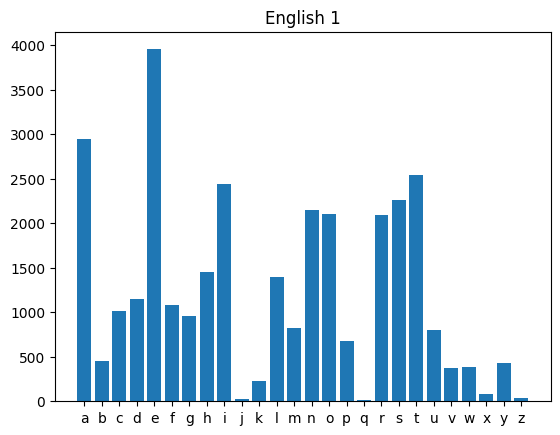

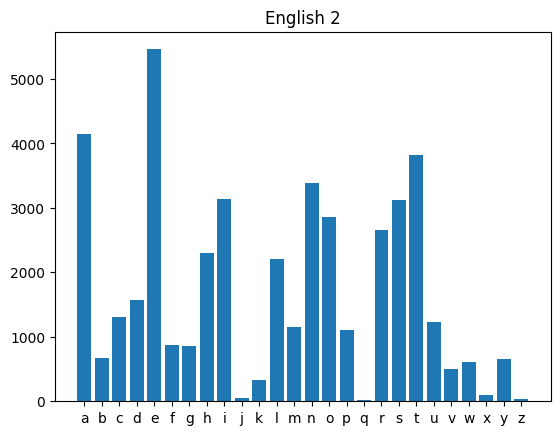

In [ ]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

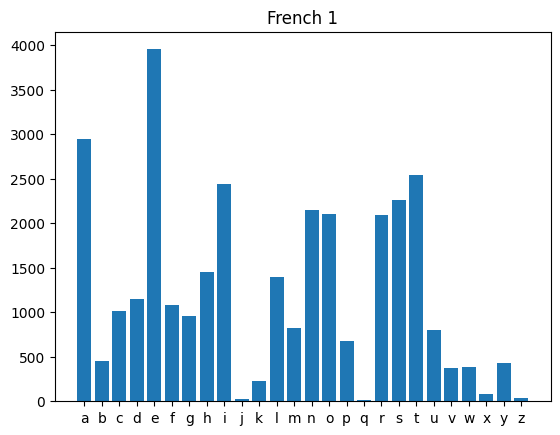

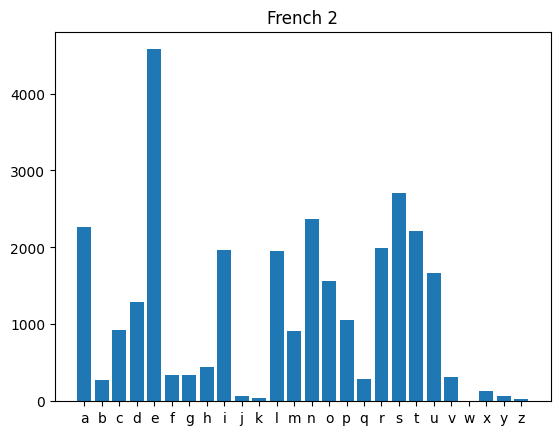

In [ ]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

Frequency of bigrams

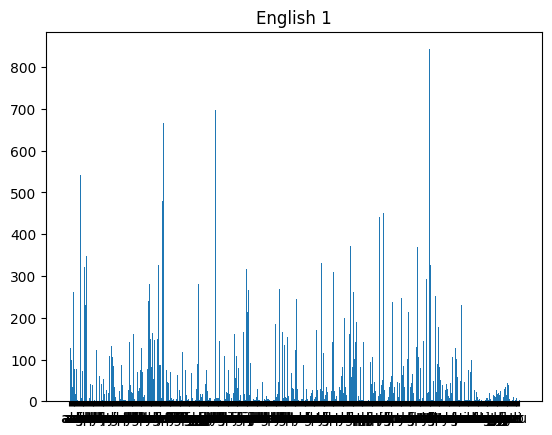

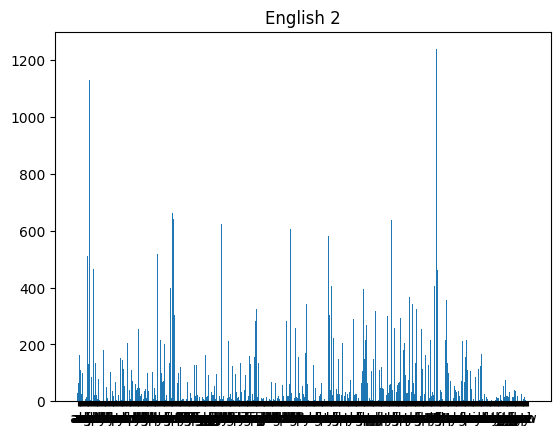

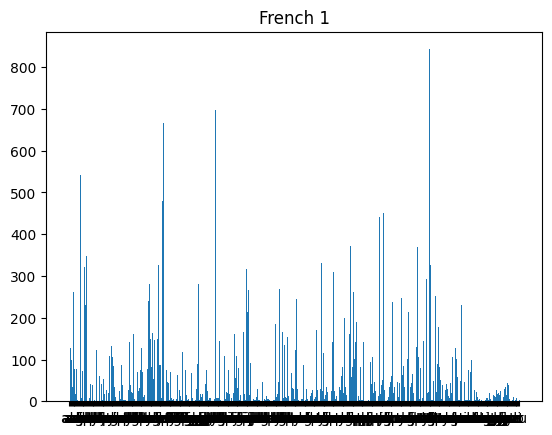

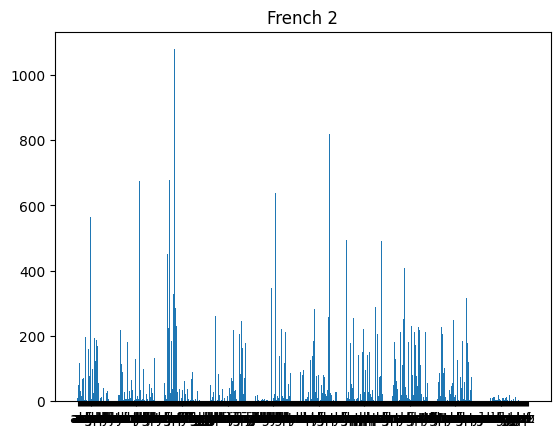

In [ ]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

In [ ]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

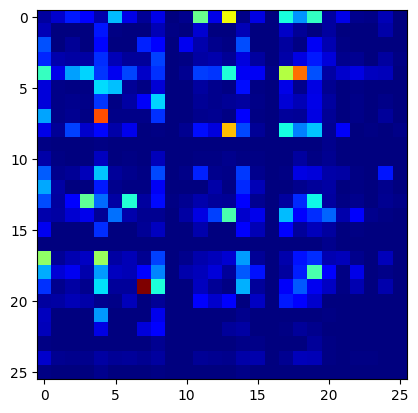

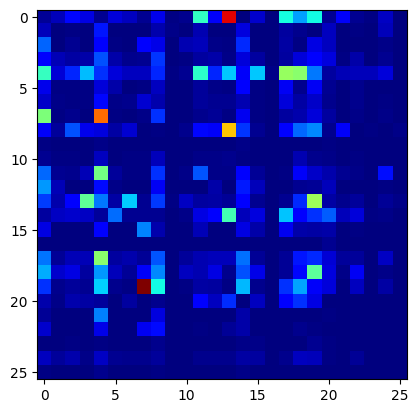

In [ ]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

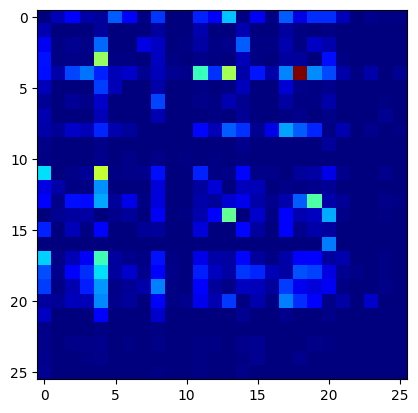

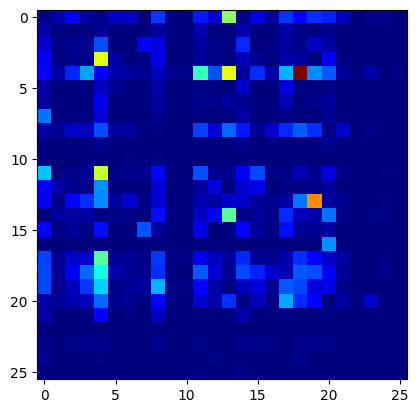

In [ ]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

In [ ]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [ ]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
('t', 'h') : 843.0
('h', 'e') : 697.0
('e', 's') : 667.0
('i', 'n') : 597.0
('a', 'n') : 543.0
('e', 'r') : 480.0
('r', 'e') : 452.0
('r', 'a') : 442.0
('a', 'l') : 402.0
('n', 'd') : 395.0

English 2:
('t', 'h') : 1238.0
('a', 'n') : 1130.0
('h', 'e') : 985.0
('i', 'n') : 867.0
('n', 't') : 669.0
('e', 'r') : 661.0
('e', 's') : 641.0
('r', 'e') : 639.0
('h', 'a') : 622.0
('l', 'e') : 607.0

French 1:
('e', 's') : 738.0
('l', 'e') : 435.0
('e', 'n') : 406.0
('d', 'e') : 394.0
('o', 'n') : 347.0
('n', 't') : 329.0
('r', 'e') : 315.0
('e', 'l') : 309.0
('l', 'a') : 254.0
('s', 'e') : 254.0

French 2:
('e', 's') : 1078.0
('n', 't') : 819.0
('e', 'n') : 679.0
('d', 'e') : 675.0
('l', 'e') : 638.0
('a', 'n') : 564.0
('o', 'n') : 494.0
('r', 'e') : 490.0
('e', 'l') : 452.0
('s', 'e') : 408.0


A few ways to explore:

1.Try with different languages.

2.The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?

3.How can we use and visualize trigrams and higher n-grams?

In [ ]:
wikipedia.set_lang('es')


In [ ]:
topic3 = 'Technology'
topic4 = 'History'

eng3 = wikipedia.page(topic3).content
eng4 = wikipedia.page(topic4).content

eng3 = cleanup(eng3)
eng4 = cleanup(eng4)

In [ ]:
print(eng3)

print(eng4)

mostechnologyinctambinconocidacomocommodoresemiconductorgroupalseradquiridaporcbmfueunfabricantedecalculadorasymicroprocesadoressiendofamosaporsumicroprocesadormostechnologypesealasimilitudnotienenadaqueverconmostekhistoriamoscomenzsiendounasegundafuentedelascalculadorasychipsinternosdiseadosportexasinstrumentstambinfabricporcortotiempoelcustomchiputilizadoporatariparasusconsolaspongmientrasqueelmercadodelacalculadoracrecimosseconvirtieventualmenteenelmayorproveedordecommodorebusinessmachinesporloqueprcticamentesunegociosebasabaensuministrarlecomponentesparasulneadecalculadoraslascosascambiarondramticamenteenvariosdelosdiseadoresdelmotoroladejaronlacompaapocodespusdesulanzamientoalparecercondisgustocomoentoncesnoexistancompaasdeslodiseolashoyconocidascomofablesstuvieronqueunirseaunacompaafabricantedechipsparapoderproducirsusdiseosmoseraunafirmapequeaconbuenascredencialesenelreaadecuadalacostaestedeestadosunidoselequipodecuatrodiseadoresestabadirigidoporchuckpeddleeincluaabillmenschenmo

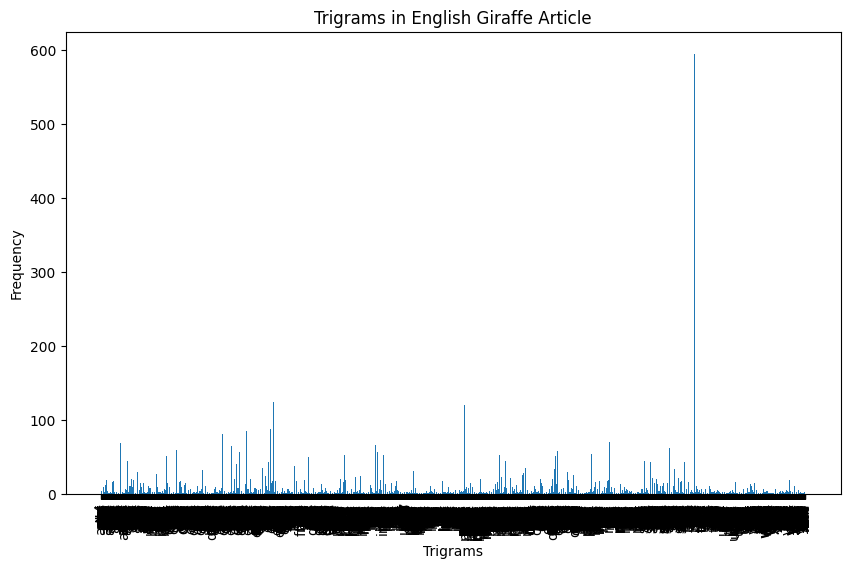

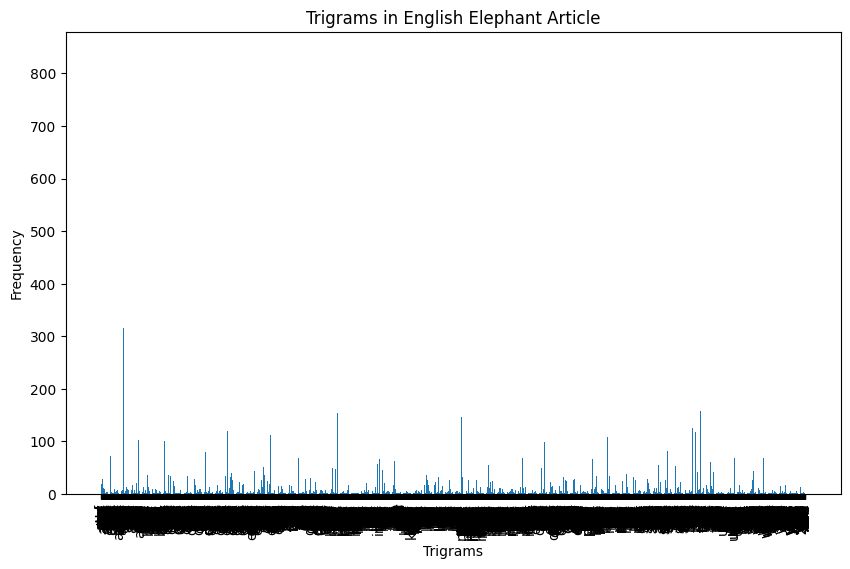

In [ ]:
def get_ngrams(text, n):
    n_grams = ngrams(text, n)
    return Counter(n_grams)

# Example with trigrams
trigrams_eng1 = get_ngrams(eng1, 3)
trigrams_eng2 = get_ngrams(eng2, 3)

# Plot trigrams
def plot_ngram_histogram(ngram, title):
    keys = key2string(ngram.keys())
    values = list(ngram.values())

    # Sort the keys in alphabetic order
    combined = zip(keys, values)
    zipped_sorted = sorted(combined, key=lambda x: x[0])
    keys, values = map(list, zip(*zipped_sorted))

    plt.figure(figsize=(10, 6))
    plt.bar(keys, values)
    plt.title(title)
    plt.xlabel('Trigrams')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.show()

plot_ngram_histogram(trigrams_eng1, 'Trigrams in English Giraffe Article')
plot_ngram_histogram(trigrams_eng2, 'Trigrams in English Elephant Article')


In [ ]:
def plot_ngram_plotly(ngram, title):
    keys = key2string(ngram.keys())
    values = list(ngram.values())

    # Create a DataFrame
    df = pd.DataFrame({'Trigram': keys, 'Frequency': values})

    # Create bar chart
    fig = px.bar(df, x='Trigram', y='Frequency', title=title)
    fig.show()

plot_ngram_plotly(trigrams_eng1, 'Trigrams in English Giraffe Article')
plot_ngram_plotly(trigrams_eng2, 'Trigrams in English Elephant Article')


# **Written numbers**

In [ ]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

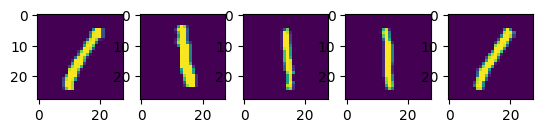

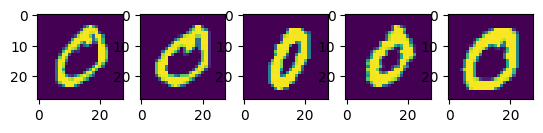

In [ ]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

In [ ]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

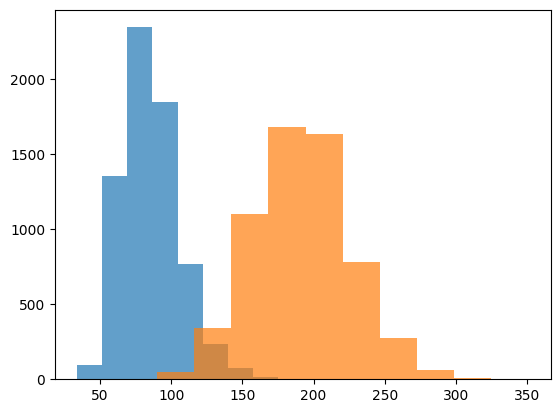

In [ ]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);

In [ ]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

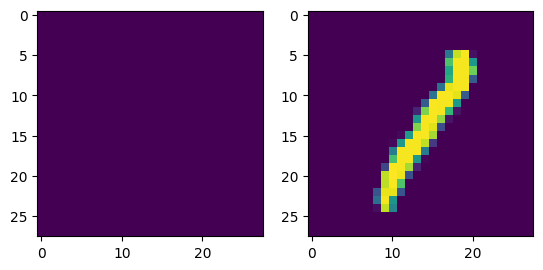

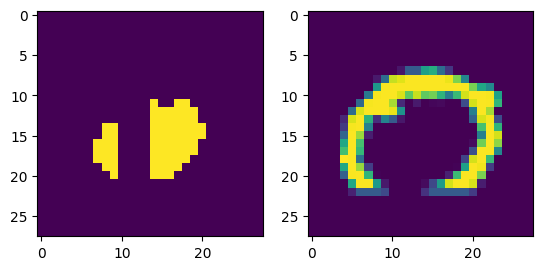

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

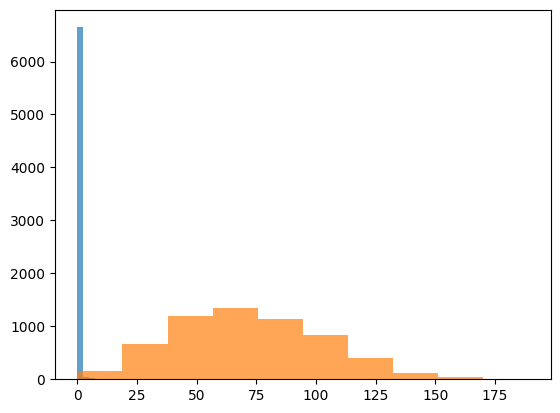

In [ ]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

In [ ]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

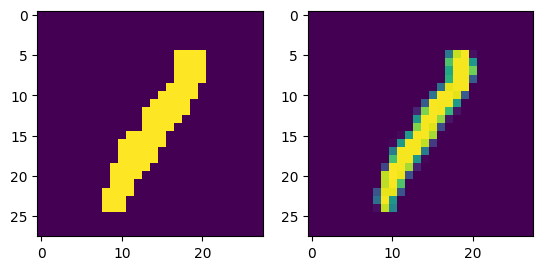

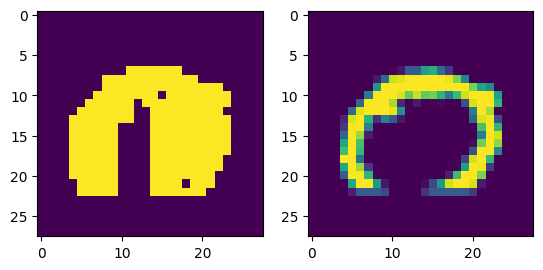

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

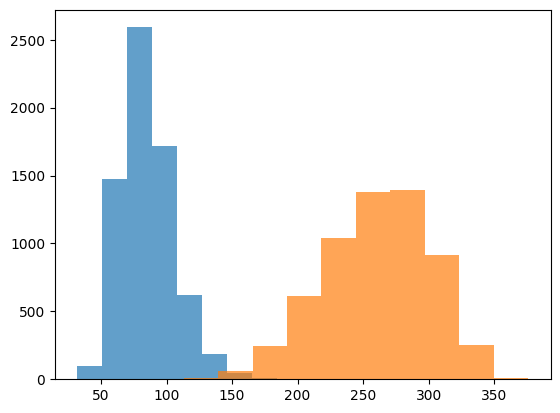

In [ ]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

In [ ]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

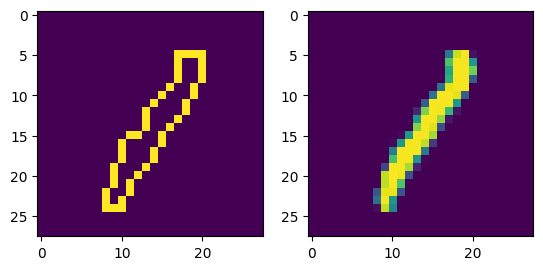

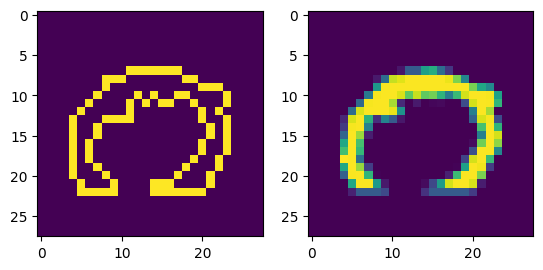

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

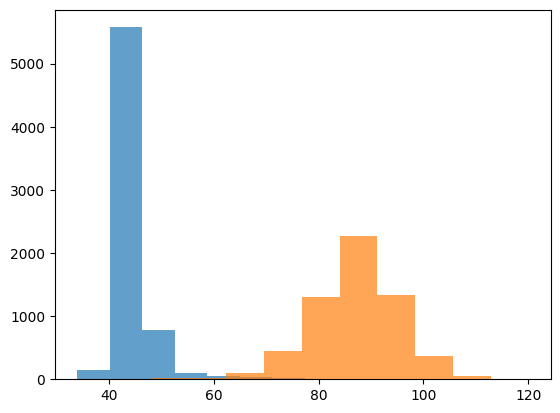

In [ ]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

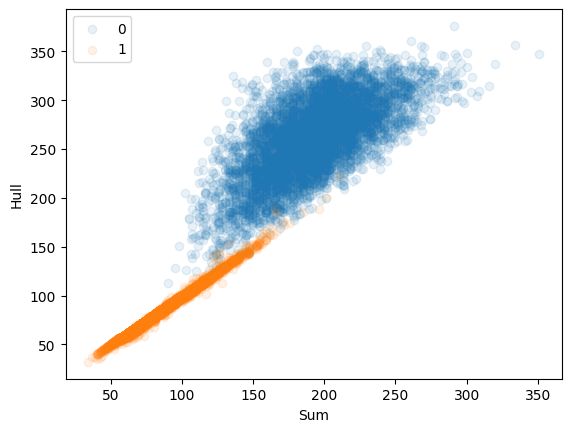

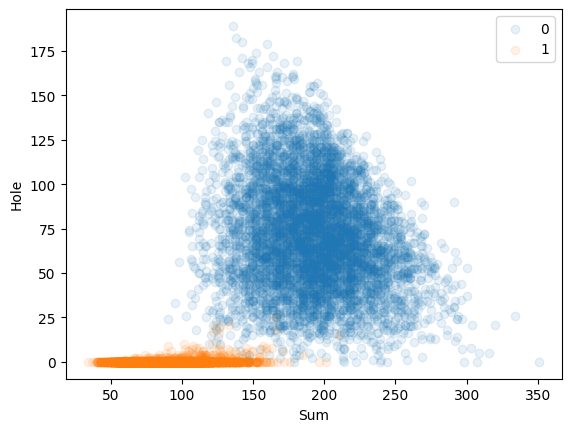

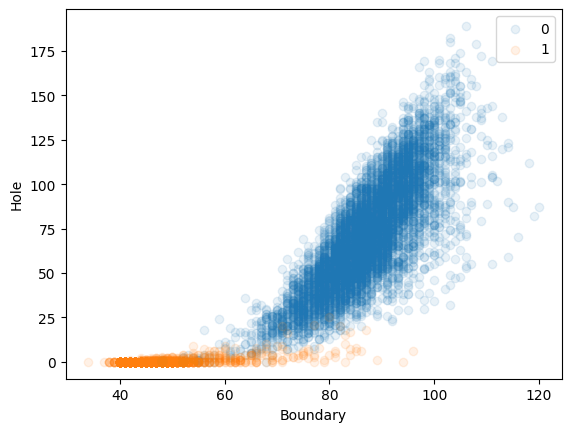

In [ ]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

In [ ]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

1.Which is the best combination of features?


The best combination of features for a dataset often depends on the specific characteristics of the data and the problem you're trying to solve. However, some general guidelines can help you select a good set of features:

Relevance: Choose features that are directly related to the target variable or the task at hand.

Complementarity: Select features that provide complementary information. Avoid redundant features that convey similar information.

Independence: Prefer features that are as independent from each other as possible, as this can improve the performance of many machine learning algorithms.

Discriminative Power: Features should be able to effectively distinguish between different classes or values in the target variable.

For the digits dataset, a combination of structural, statistical, and geometric features can be effective.



2 . How would you test or visualize four or more features?


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA


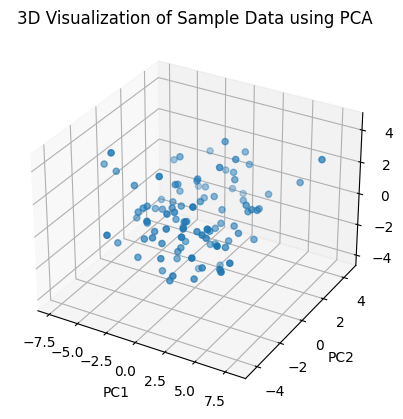

In [6]:

np.random.seed(0)
n_samples = 100
feature1 = np.random.normal(loc=0, scale=1, size=n_samples)
feature2 = np.random.normal(loc=0, scale=2, size=n_samples)
feature3 = np.random.normal(loc=0, scale=0.5, size=n_samples)
feature4 = np.random.normal(loc=0, scale=3, size=n_samples)
feature5 = np.random.normal(loc=0, scale=1.5, size=n_samples)

# Combine features into a single array
X = np.array([feature1, feature2, feature3, feature4, feature5]).T

# Perform PCA to reduce dimensionality to 3 components
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

# Visualize in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D Visualization of Sample Data using PCA')
plt.show()



3.Can you come up with your own features?

Yes we can have more features like :

Black/White Ratio: Ratio of black to white pixels.

Horizontal Symmetry: Symmetry along the vertical axis.

Vertical Symmetry: Symmetry along the horizontal axis.

Edge Curvature: Approximation using the perimeter of edges.

Mean Intensity: Average pixel intensity.

Standard Deviation of Intensity: Variability of pixel intensities.

Aspect Ratio: Ratio of the width to the height of the bounding box of the digit.

Compactness: Ratio of the area of the digit to the perimeter squared.

Euler Number: Measure of the number of objects minus the number of holes in the image.


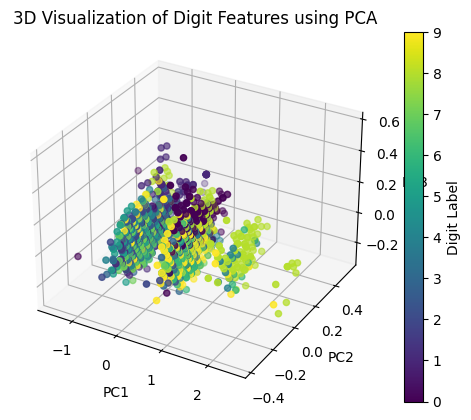

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, filters, measure, morphology
from skimage.transform import resize
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

digits = load_digits()
images = digits.images
n_samples = len(images)

def calculate_features(image):
    image = resize(image, (8, 8))
    image = (image > filters.threshold_otsu(image)).astype(int)

    # Feature 1: Ratio of black to white pixels
    black_white_ratio = np.sum(image == 1) / np.sum(image == 0)

    # Feature 2: Horizontal symmetry
    half_size = image.shape[0] // 2
    left_half = image[:, :half_size]
    right_half = image[:, half_size:]
    right_half_flipped = np.fliplr(right_half)
    horizontal_symmetry = np.sum(left_half == right_half_flipped) / left_half.size

    # Feature 3: Vertical symmetry
    top_half = image[:half_size, :]
    bottom_half = image[half_size:, :]
    bottom_half_flipped = np.flipud(bottom_half)
    vertical_symmetry = np.sum(top_half == bottom_half_flipped) / top_half.size

    # Feature 4: Edge curvature (approximated by the perimeter of edges)
    edges = filters.sobel(image)
    curvature = measure.perimeter(edges)

    # Feature 5: Mean intensity
    mean_intensity = np.mean(image)

    # Feature 6: Standard deviation of intensity
    std_intensity = np.std(image)

    # Feature 7: Aspect ratio (bounding box)
    region_props = measure.regionprops(image)
    if region_props:
        minr, minc, maxr, maxc = region_props[0].bbox
        aspect_ratio = (maxc - minc) / (maxr - minr)
    else:
        aspect_ratio = 0

    # Feature 8: Compactness
    area = np.sum(image)
    perimeter = measure.perimeter(image)
    if perimeter == 0:
        compactness = 0
    else:
        compactness = area / (perimeter ** 2)

    # Feature 9: Euler number
    euler_number = measure.euler_number(image)

    return [
        black_white_ratio,
        horizontal_symmetry,
        vertical_symmetry,
        curvature,
        mean_intensity,
        std_intensity,
        aspect_ratio,
        compactness,
        euler_number
    ]

# Calculate features for all images
features = np.array([calculate_features(image) for image in images])

# Perform PCA to reduce dimensionality to 3 components
pca = PCA(n_components=3)
features_pca = pca.fit_transform(features)

# Visualize in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(features_pca[:, 0], features_pca[:, 1], features_pca[:, 2], c=digits.target, cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D Visualization of Digit Features using PCA')
plt.colorbar(scatter, ax=ax, label='Digit Label')
plt.show()



4.Will these features work for different classes other than 0 and 1?

Yes but the effectiveness of these features can vary depending on the specific characteristics of the images in different classes. While some features, like symmetry or aspect ratio, may generalize well across different classes of digits, others might be more specific to certain shapes or patterns. For example, the curvature feature might be more useful for distinguishing between digits with more complex shapes (like 8 or 9) compared to simpler shapes (like 1 or 7).

To ensure the features are effective for different classes, it might be necessary to analyze the specific characteristics of the images in those classes and adapt or create new features accordingly. Here are some additional features that might be useful for a broader range of digit classes:

1.Number of Connected Components

2.Density of Pixels

3.Moments of Inertia

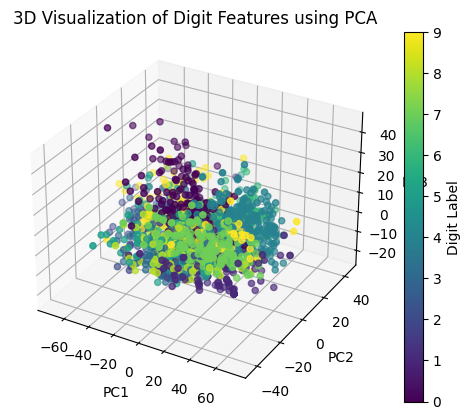

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, filters, measure, morphology
from skimage.transform import resize
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

# Load a sample dataset of handwritten digits
digits = load_digits()
images = digits.images
n_samples = len(images)

def calculate_features(image):
    image = resize(image, (8, 8))
    image = (image > filters.threshold_otsu(image)).astype(int)

    # Feature 1: Ratio of black to white pixels
    black_white_ratio = np.sum(image == 1) / np.sum(image == 0)

    # Feature 2: Horizontal symmetry
    half_size = image.shape[0] // 2
    left_half = image[:, :half_size]
    right_half = image[:, half_size:]
    right_half_flipped = np.fliplr(right_half)
    horizontal_symmetry = np.sum(left_half == right_half_flipped) / left_half.size

    # Feature 3: Vertical symmetry
    top_half = image[:half_size, :]
    bottom_half = image[half_size:, :]
    bottom_half_flipped = np.flipud(bottom_half)
    vertical_symmetry = np.sum(top_half == bottom_half_flipped) / top_half.size

    # Feature 4: Edge curvature (approximated by the perimeter of edges)
    edges = filters.sobel(image)
    curvature = measure.perimeter(edges)

    # Feature 5: Mean intensity
    mean_intensity = np.mean(image)

    # Feature 6: Standard deviation of intensity
    std_intensity = np.std(image)

    # Feature 7: Aspect ratio (bounding box)
    region_props = measure.regionprops(image)
    if region_props:
        minr, minc, maxr, maxc = region_props[0].bbox
        aspect_ratio = (maxc - minc) / (maxr - minr)
    else:
        aspect_ratio = 0

    # Feature 8: Compactness
    area = np.sum(image)
    perimeter = measure.perimeter(image)
    if perimeter == 0:
        compactness = 0
    else:
        compactness = area / (perimeter ** 2)

    # Feature 9: Euler number
    euler_number = measure.euler_number(image)

    # Feature 10: Number of connected components
    labeled_image = measure.label(image)
    num_components = np.max(labeled_image)

    # Feature 11: Pixel density
    pixel_density = np.sum(image) / image.size

    # Feature 12: Moments of inertia (central moments)
    moments = measure.moments_central(image)
    inertia = [moments[2, 0], moments[0, 2], moments[1, 1]]  # Central moments: mu20, mu02, mu11


    return [
        black_white_ratio,
        horizontal_symmetry,
        vertical_symmetry,
        curvature,
        mean_intensity,
        std_intensity,
        aspect_ratio,
        compactness,
        euler_number,
        num_components,
        pixel_density,
        *inertia,
    ]

features = np.array([calculate_features(image) for image in images])

pca = PCA(n_components=3)
features_pca = pca.fit_transform(features)

# Visualize in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(features_pca[:, 0], features_pca[:, 1], features_pca[:, 2], c=digits.target, cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D Visualization of Digit Features using PCA')
plt.colorbar(scatter, ax=ax, label='Digit Label')
plt.show()


5.What will happen if we take more that two classes at a time?

If we take more than two classes at a time in a dataset, you can visualize and analyze the relationships and distinctions between these multiple classes. The techniques like PCA, t-SNE, parallel coordinates plots can be used, but with some considerations and adaptations:

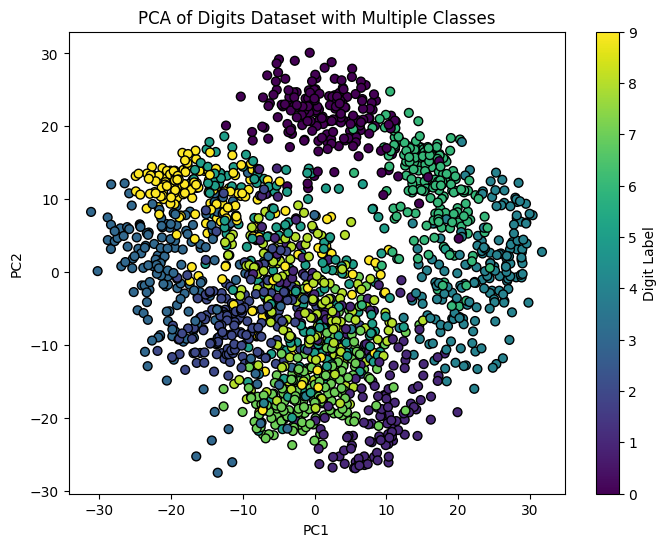

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Digits Dataset with Multiple Classes')
plt.colorbar(scatter, label='Digit Label')
plt.show()


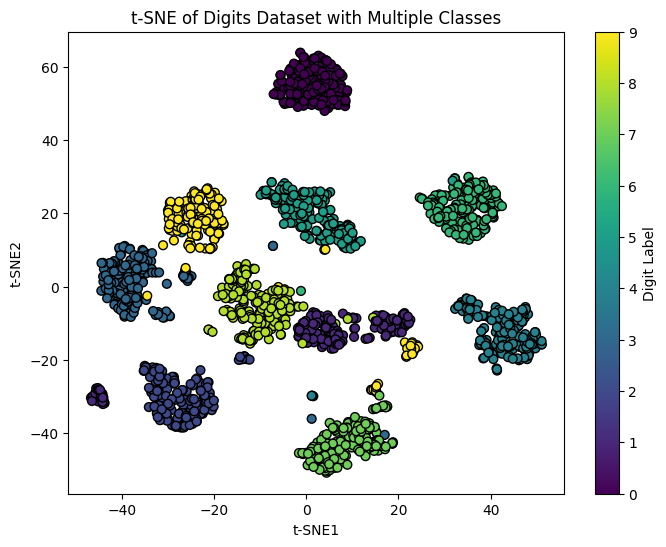

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

# Perform t-SNE to reduce dimensionality to 2 components
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Visualize the t-SNE-transformed data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('t-SNE of Digits Dataset with Multiple Classes')
plt.colorbar(scatter, label='Digit Label')
plt.show()
